# Desafio 2526 Gráficos y Correlación

* Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip

## 1. Importar librerías y .csv

* Importe las librerías básicas para el análisis de datos
* Descarge e importe el archivo nations.csv. warning: va a encontrar un error en el formato

¿Cómo lo podemos solucionar?.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (8, 6)

In [2]:
df = pd.read_csv('nations.csv', encoding='latin-1')

**¿Cómo lo podemos solucionar el error?**

El archivo csv no está encodeado en UTF-8, sino que contiene caracteres en encoding latin-1, por lo tanto hay que
indicar como opción ```encoding='latin-1'```

In [3]:
df.shape

(194, 14)

In [4]:
df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


La base de datos contiene información a nivel mundial sobre demografía:

* ```country```: País.
* ```region```: Continente del país.
* ```gdp```: Producto Interno Bruto per cápita, precios 2005.
* ```school```: Promedio años de escolaridad.
* ```adfert```: Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
* ```chldmort```: Probabilidad de muerte antes de los 5 años por cada 1000.
* ```life```: Esperanza de vida al nacer.
* ```pop```: Población total.
* ```urban```: Porcentaje de población urbana.
* ```femlab```: Tasa entre hombres y mujeres en el mercado laboral.
* ```literacy```: Tasa de alfabetismo.
* ```co2```: Toneladas de Co2 mitidas per cápita.
* ```gini```: Coeficiente de desigualdad del ingreso.
* Apellidos desde la M hasta la Z: Enfocarse en las variables ```femlab```, ```literacy``` y ```school```.

Apellido: Porras

## 2. Refactor gráficos ```mathplotlib``` a ```seaborn```

A  continuación se  presenta una  serie de  gráficos construídos con matplotlib.  Se  le  piderefactorizarlos utilizando seaborn.

* Se presenta la función que se utilizó para construírlos. Intente llegar al resultado con mayor similitud. Comente los principales resultados de los gráficos.

## A.)

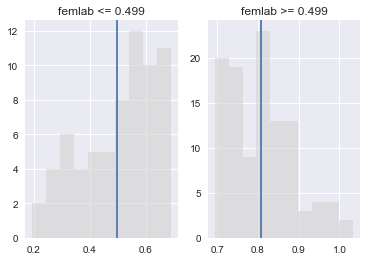

In [5]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]),
                                              1,
                                              0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.show()

binarize_histogram(df, 'femlab')


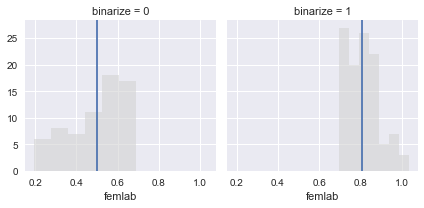

In [38]:
def vertical_mean_line(x, **kwargs):
    plt.axvline(x.mean(), **kwargs)

def binarize_histogram_sns(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]),
                                              1,
                                              0)
    grid = sns.FacetGrid(dataframe, col="binarize", col_wrap=2)
    grid = grid.map(sns.distplot, variable, color='lightgray', kde=False, hist_kws={"alpha": 0.6})
    grid = grid.map(vertical_mean_line, variable)

binarize_histogram_sns(df, 'femlab')